In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


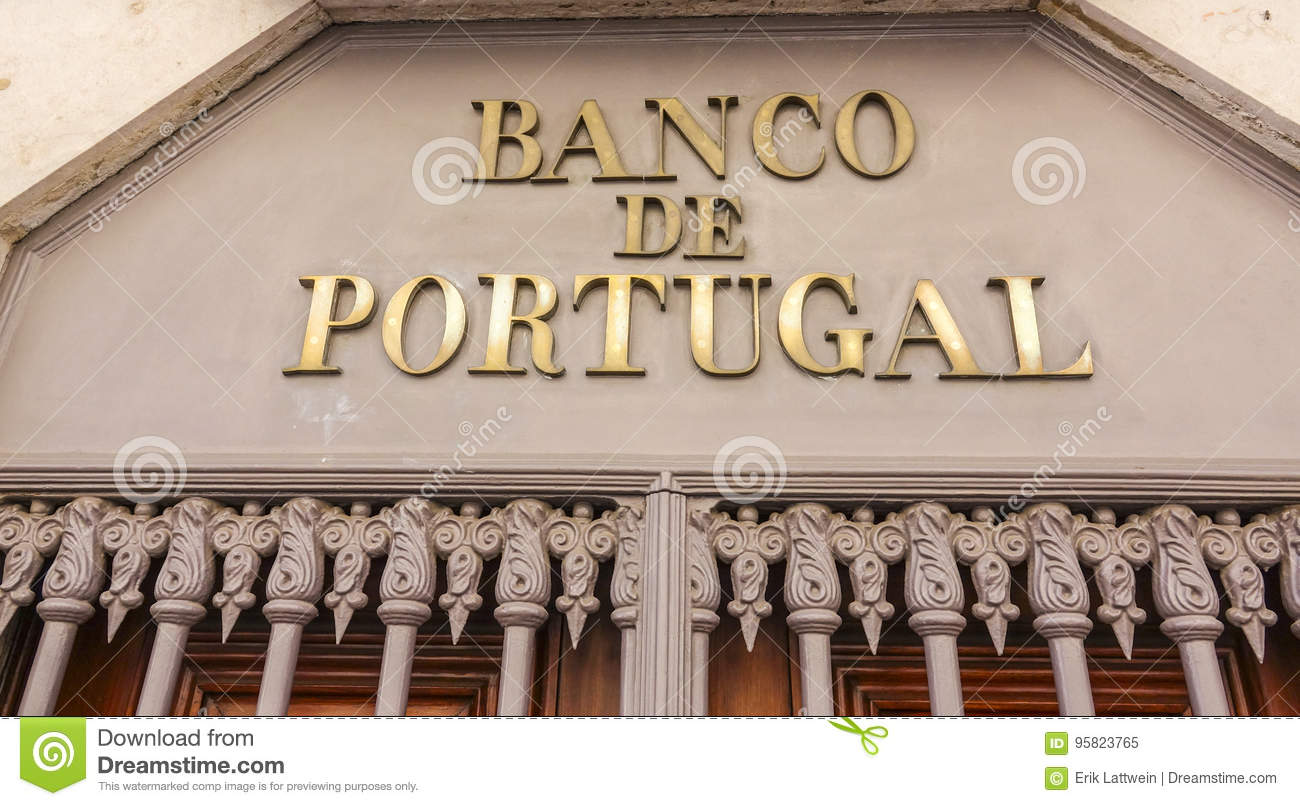

# Data Overview and Description

This dataset comprises details of a telephone marketing campaign conducted by a Portuguese bank, with the objective of encouraging their customers to enroll in a long-term deposit program.

The dataset, used for analysis purposes, consists of 21 attributes that encompass both categorical and numerical data, including floating-point numbers, integers, and object types. The dataset contains a total of 44,188 instances, with no instances of null values. However, certain information within the dataset is classified as 'unknown' or 'other'.

In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


In [10]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [11]:
data_bta = pd.read_csv('/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv')
data_bta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
data_bta.shape

(41188, 21)

In [13]:
data_bta.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Business Question

**Which demographic exhibits the highest likelihood of subscribing to a term deposit?**

Conducting a thorough evaluation of our direct marketing campaigns and their influence on the success rate of bank loan outcomes among specific demographics holds significant importance. This assessment will provide valuable insights to decide whether to continue with a broad telemarketing campaign or implement a targeted marketing strategy to effectively increase the number of long-term loan deposits.

# Outcome Variable

The objective is to determine whether clients have subscribed to a term deposit, which serves as the outcome variable. In our dataset, this variable is denoted as "y" with two possible outcomes: "yes" or "no." However, we face a challenge with a low subscription rate, prompting the bank to seek methods to boost the number of deposits. Approximately 25% of the individuals contacted during the campaign expressed agreement towards a term deposit. Notably, the data reveals that only 11.27% of customers ultimately subscribed following the phone marketing attempt.

In [14]:
# How many people subscribed to a term deposit through the bank marketing campaign?
data_bta.y.value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
data_bta.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

# Data Model

**1,Term Subscriptions by Occupation**

The initial variable under examination in relation to the outcome variable is the job category. Our goal is to identify the occupation status most inclined to subscribe to a term deposit. Notably, the 'retired' demographic exhibits the highest subscription rate at 25.23%, followed by the 'student' demographic with a subscription rate of 31.43%. Conversely, the 'blue-collar' demographic demonstrates the lowest number of term deposit subscriptions.

In [16]:
data_bta.rename(index=str, columns={'y': 'outcome'}, inplace = True)

In [17]:
no_job = (data_bta['job'] == 'unknown')
db = data_bta.drop(data_bta[no_job].index, axis = 0, inplace = False)

In [18]:
job_outcome_pct = pd.crosstab(data_bta['outcome'],db['job']).apply(lambda x: x/x.sum() * 100)
job_outcome_pct = job_outcome_pct.transpose()

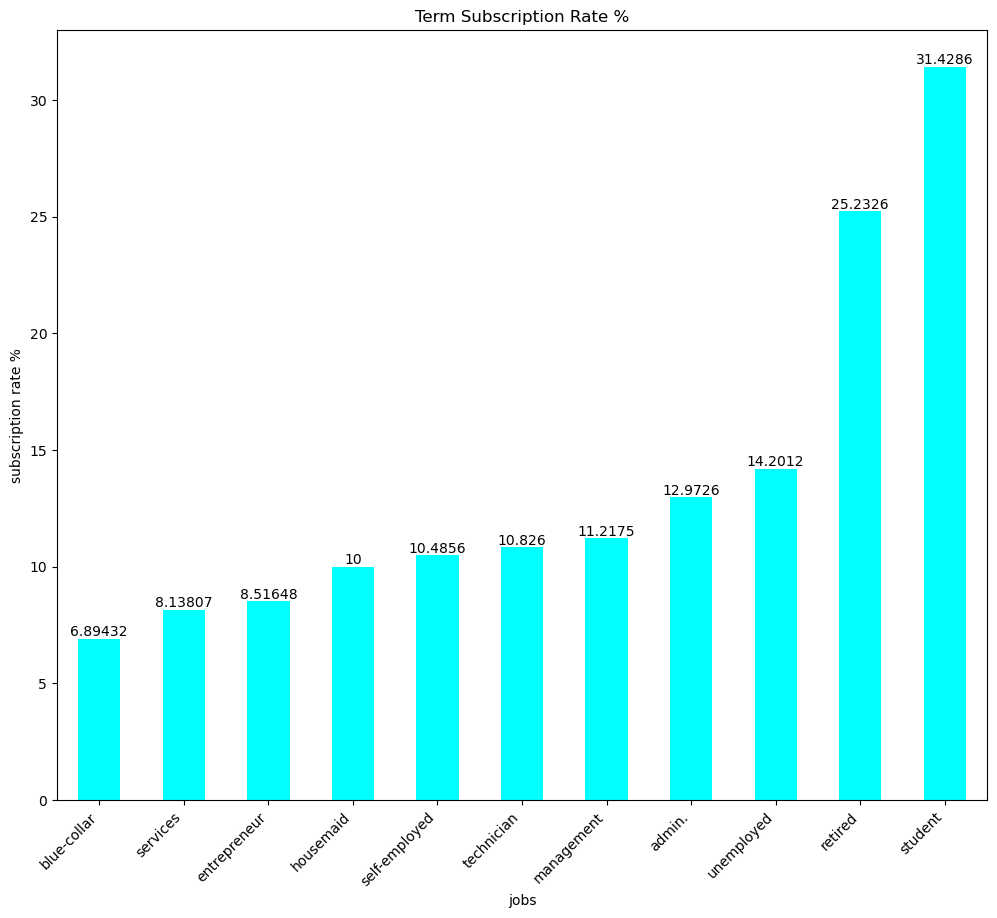

In [19]:
plot_job = job_outcome_pct['yes'].sort_values(ascending = True).plot(kind ='bar',
figsize = (12,10), color='aqua')
plt.title('Term Subscription Rate %')
plt.xlabel('jobs')
plt.xticks(rotation=45,ha='right')
plt.ylabel('subscription rate %')
plt.bar_label(plot_job.containers[0])
plt.show()


In [20]:
print(job_outcome_pct['yes'])

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
Name: yes, dtype: float64


**2,Current and Previous Outcomes with Age**

Another variable of interest is age. This analysis focuses on identifying the age groups that are more likely to subscribe to a term deposit. Additionally, we compare the current outcomes of the latest marketing campaign with those individuals who had previously subscribed to a term deposit.

The data reveals that the age group below 30 initially shows a significant number of deposits. However, as we move into the middle age range, the subscription rate starts to decline. Interestingly, it then begins to increase again, with the age group over 60 demonstrating the highest number of subscriptions in both the current marketing campaign and retaining deposits from the previous campaign.

In [21]:
data_bta.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [22]:
data_bta.drop(data_bta[data_bta['poutcome'] == "nonexistent"].index, inplace=True)
data_bta.poutcome.value_counts() 

failure    4252
success    1373
Name: poutcome, dtype: int64

In [23]:
ages = [data_bta]
for column in ages:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [24]:
count_age_response_pct = pd.crosstab(data_bta['outcome'],data_bta['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [25]:
print(count_age_response_pct)

outcome           no        yes
age_group                      
20.0       66.970618  33.029382
30.0       78.488889  21.511111
40.0       79.808529  20.191471
50.0       73.013871  26.986129
60.0       45.515695  54.484305


In [26]:
prev_age_response_pct = pd.crosstab(data_bta['poutcome'],data_bta['age_group']).apply(lambda x: x/x.sum() * 100)
prev_age_response_pct = prev_age_response_pct.transpose() 

In [27]:
age = pd.DataFrame(data_bta['age_group'].value_counts())
age['Previous Deposit'] = prev_age_response_pct['success']
age['Current Outcome'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

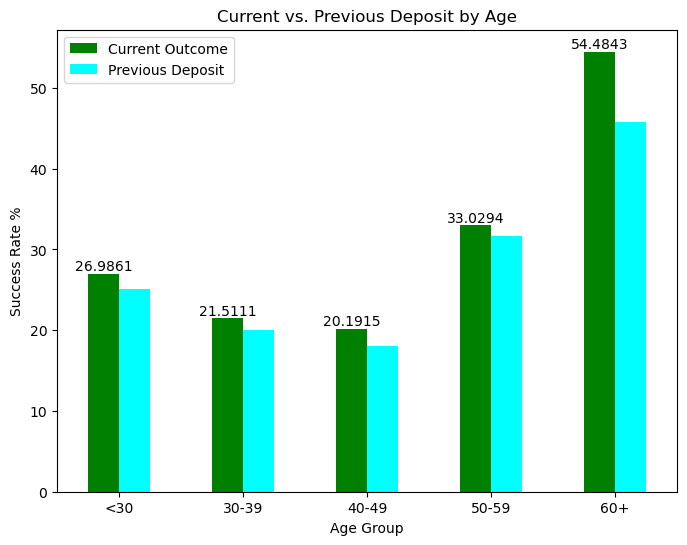

In [28]:
plot_age = age[['Current Outcome','Previous Deposit']].plot(kind = 'bar',
figsize=(8,6),color=['green', 'aqua'])

plt.xlabel('Age Group')
plt.ylabel('Success Rate %')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation = 'horizontal')
plt.title('Current vs. Previous Deposit by Age')
plt.bar_label(plot_age.containers[0])
plt.show()

# Decision Tree

To determine the demographic most likely to subscribe to a term deposit, we can employ a decision tree algorithm. This decision tree will be constructed using pertinent demographic features like age, occupation, income, education level, and more. The training of the decision tree will be performed on a dataset that contains information on whether individuals have subscribed to a term deposit or not. By analyzing this decision tree, we can identify the demographic characteristics that have the greatest influence on the likelihood of subscribing to a term deposit.

In [29]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [30]:
cat_columns = data_bta.select_dtypes(['object']).columns
data_bta[cat_columns] = data_bta[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [31]:
feature_cols = ['job', 'education']
X = data_bta[feature_cols] 
y = data_bta.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [32]:
clf = DecisionTreeClassifier(splitter="random", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7364444444444445


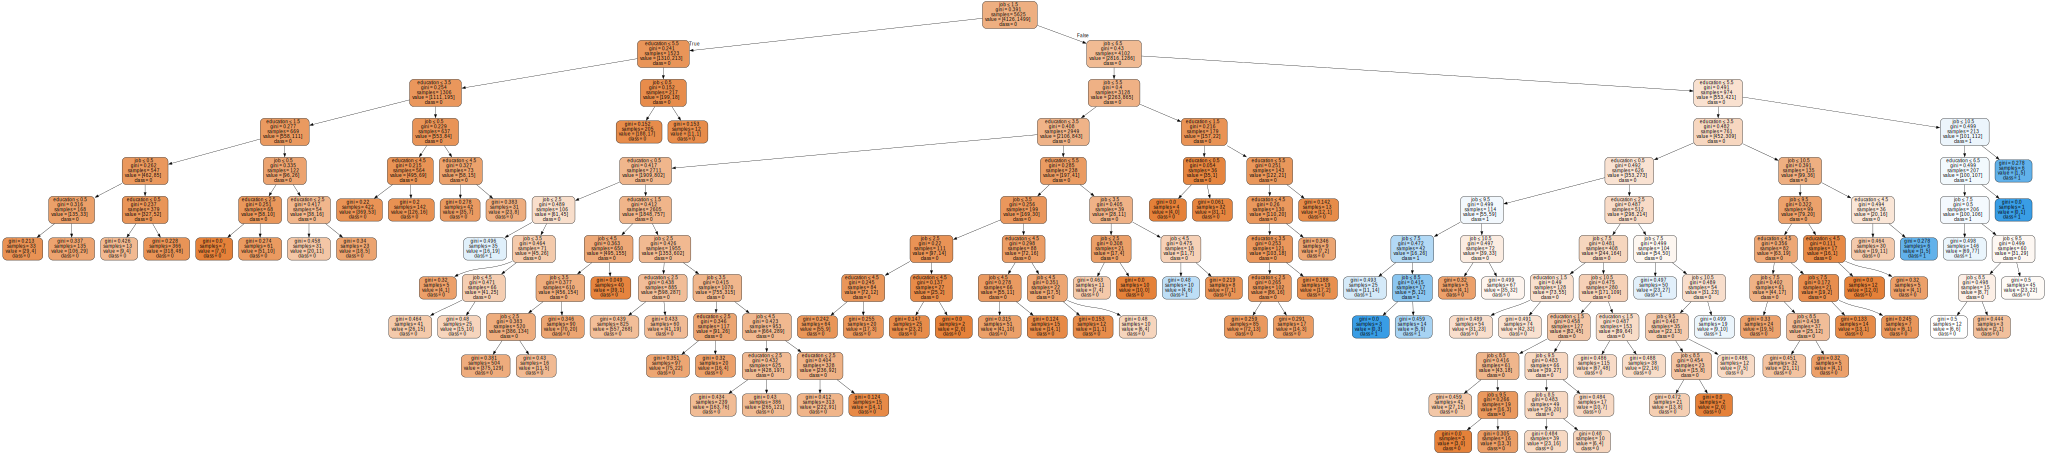

In [34]:
from sklearn import tree
import graphviz
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree,filled=True, rounded=True,
                special_characters=True,feature_names=feature_cols,out_file=None, class_names=['0','1'])
graph = graphviz.Source(data)
graph



# Executive Summary 

**Business Question**

The objective of this analysis was to predict the likelihood of customers subscribing to a long-term deposit based on demographic attributes. The key business question was to identify the demographic most likely to subscribe and recommend targeted marketing strategies to increase long-term deposit subscriptions.

**Variables**

The dataset used in this analysis includes categorical attributes such as age, education, marital status, and occupation, which describe customer demographics. We focused on the variables of age and occupation to examine their influence on term deposit subscriptions. The outcome variable 'y' indicates whether customers subscribed to a term deposit, and we compared it to previous subscription outcomes. Pivot tables and bar charts were used to visualize the data. We excluded the 'unknown' demographic category in the occupation attribute and removed data labeled as 'nonexistent' in previous outcomes. To analyze the data, we utilized a decision tree algorithm, chosen for its ability to handle categorical variables and provide interpretable results. The decision tree helped us identify important factors in term deposit subscriptions and understand patterns within the data.

**Key Findings**

In our analysis, we examined the occupation and age demographics to understand their impact on term deposit subscriptions. Among the occupation groups, students had the highest subscription rate at 31.43%, followed by retirees at 25.23%. These two demographics accounted for a significant proportion of term deposit subscribers, collectively comprising over half of the occupations that subscribed.

Turning to the age demographics, we categorized individuals into five groups. The success rate of term subscriptions was highest among the age group over 60, with an impressive rate of nearly 55%. The success rate for the group under 30 started at approximately 27%, declined in the middle age group, and then began to rise again. Notably, the success rates were compared to the previous term deposits, revealing a consistent pattern across different age groups.


**Model Selection** 
The decision tree model was selected due to its interpretability and suitability for categorical and numerical features. The model was trained and tested on the dataset, using 60% for training and 40% for testing. The decision tree visualization provided additional insights into the relationships between variables.

**Iterations and Refinements**
The decision tree model was iteratively refined, considering various metrics such as accuracy, precision, and recall. The goal was to optimize the model's predictive performance in identifying the likelihood of term deposit subscriptions based on demographics.

**Conclusions**
The analysis identified two key demographics with higher subscription rates: students and retirees. Targeted marketing strategies tailored to these demographics are likely to yield better results in increasing long-term deposit subscriptions.

**Recommendations**
The company should continue to collect data with online marketing campaigns and customer surveys to get recent and detailed information to confirm the analysis. If the new targeted marketing campaign is successful, we will see an increase in long-term deposit subscribers.Additionally, it is recommended that the company continues to collect data through online marketing campaigns and customer surveys. This will provide valuable insights into recent and detailed information, helping to validate and refine the analysis. By gathering feedback from customers, the company can gain a deeper understanding of their preferences, needs, and expectations, allowing for further optimization of marketing strategies. Moreover, monitoring the success of the targeted marketing campaign will provide feedback on its effectiveness in increasing long-term deposit subscriptions. If the campaign proves successful, with a noticeable increase in subscribers, it would be beneficial to further invest in and expand the targeted marketing approach.


